In [18]:
%matplotlib inline

# Load images and crop it


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import crop
from skimage import transform
import pydicom
from pydicom.data import get_testdata_files
#import sys
import glob
import os

os.chdir('/Users/maigva/Documents/Notebooks/datosCRX/scans')
#os.chdir('/Users/maigva/Documents/covid_subjects')

# load the DICOM files.... esto se tiene que acoplar a la estructura del ficheros de XNAT
# list_files=glob.glob('*/**/**/**/**/**/**/*.dcm')
list_files=glob.glob('*/**/*.dcm')
files = []

#for i in len(list_files)
for fname in (list_files):
    #print("loading: {}".format(fname))
    print(fname)
    files.append(pydicom.dcmread(fname))
    print(files[0][0x0008, 0x1090].value)
    if (files[0][0x0008, 0x1090].value=="RX_ELX04"):
        print("loading RX_ELX04: {}".format(fname))
 




1_2_840_113654_2_70_1_138418922933951907329012811305135075746_unknown/DICOM/1.2.840.113654.2.70.1.319561931234443753194831715283782674818-no-value-for-SeriesNumber-no-value-for-InstanceNumber-14hpl1e.dcm
RX_ELX04
loading RX_ELX04: 1_2_840_113654_2_70_1_138418922933951907329012811305135075746_unknown/DICOM/1.2.840.113654.2.70.1.319561931234443753194831715283782674818-no-value-for-SeriesNumber-no-value-for-InstanceNumber-14hpl1e.dcm
1_2_840_113654_2_70_1_138418922933951907329012811305135075746_unknown/DICOM/1.2.840.113654.2.70.1.319561931234443753194831715283782674818-no-value-for-SeriesNumber-no-value-for-InstanceNumber-xqnthg.dcm
RX_ELX04
loading RX_ELX04: 1_2_840_113654_2_70_1_138418922933951907329012811305135075746_unknown/DICOM/1.2.840.113654.2.70.1.319561931234443753194831715283782674818-no-value-for-SeriesNumber-no-value-for-InstanceNumber-xqnthg.dcm
1526/DICOM/1.2.840.113654.2.70.1.272773262678460368037194344695166264715-1526-1-jrg3gy.dcm
RX_ELX04
loading RX_ELX04: 1526/DICOM/1.2

In [21]:
len(list_files)

4

In [23]:
print(files[0][0x0008, 0x1090])

(0008, 1090) Manufacturer's Model Name           LO: 'RX_ELX04'


### Disponemos de conjunto de imagenes algunas identificadas y otras no

file count: 4
(0008, 1090) Manufacturer's Model Name           LO: 'RX_ELX04'
(0008, 1090) Manufacturer's Model Name           LO: 'RX_ELX04'


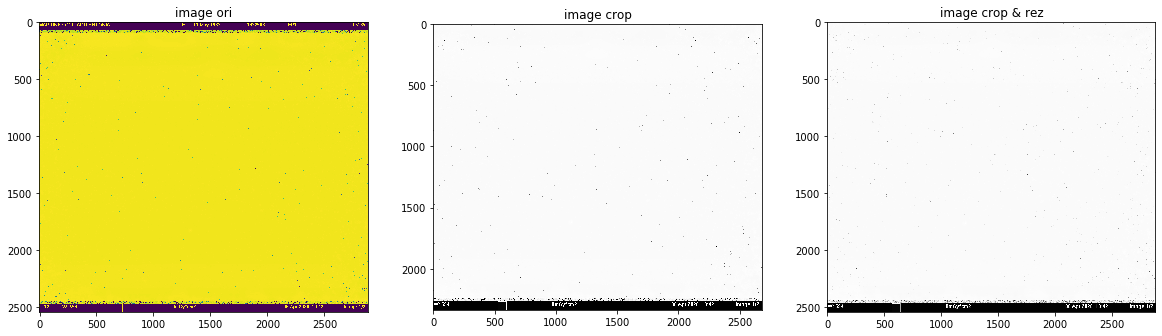

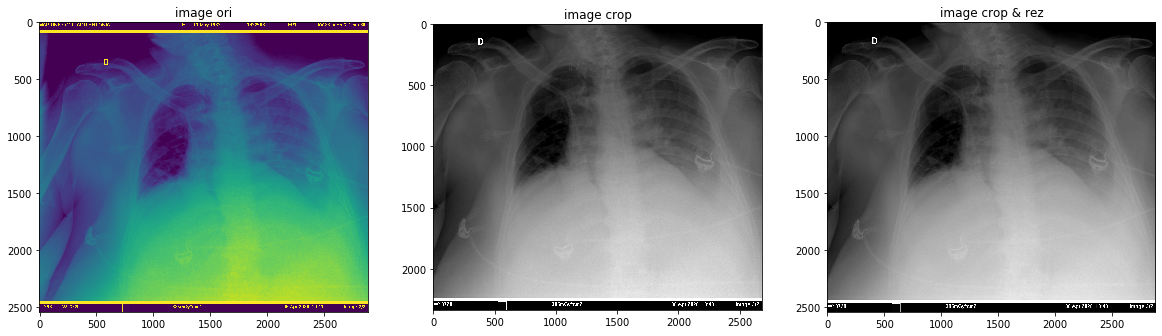

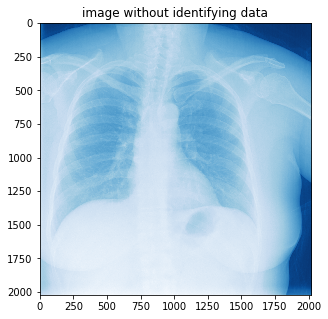

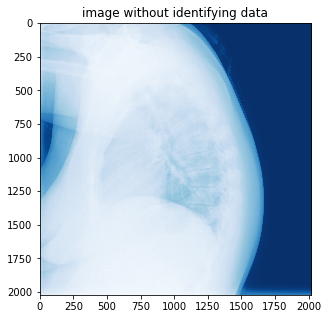

In [24]:
print("file count: {}".format(len(files)))

for i, s in enumerate(files):
    if (files[i][0x0008, 0x1090].value=="RX_ELX04"):
        img2d_list = files[i].pixel_array
        B = crop(img2d_list, ((200, 0)))
        C = transform.resize(B,img2d_list.shape)
        # imprimir solo para verificar faltaría guardarlo en disco
        fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, nrows=1, figsize =(20,20))
        ax1.set_title('image ori')
        ax1.imshow(img2d_list)
        ax2.set_title('image crop')
        ax2.imshow(B, cmap='gray')
        ax3.set_title('image crop & rez')
        ax3.imshow(C, cmap='gray')
    else:
        print(files[0][0x0008, 0x1090])
        fig3,(ax1)= plt.subplots(ncols=1, nrows=1, figsize =(5,5))
        ax1.set_title('image without identifying data')
        ax1.imshow(files[i].pixel_array, cmap ='Blues_r')
        